# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# About the data

#### **Context**

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

#### **Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#### **About columns :**

**customerID :** `Customer ID`

 **gender :** `Whether the customer is a male or a female`

  **SeniorCitizen :** `Whether the customer is a senior citizen or not (1, 0)`

  **Partner :** `Whether the customer has a partner or not (Yes, No)`

  **Dependents :** `Whether the customer has dependents or not (Yes, No)`

  **tenure :** `Number of months the customer has stayed with the company`

  **PhoneService :** `Whether the customer has a phone service or not (Yes, No)`

  **MultipleLines :** `Whether the customer has multiple lines or not (Yes, No, No phone service)`

  **InternetService :** `Customer’s internet service provider (DSL, Fiber optic, No)`

  **OnlineSecurity :** `Whether the customer has online security or not (Yes, No, No internet service)`

  **OnlineBackup :** `Whether the customer has online backup or not (Yes, No, No internet service)`

  **DeviceProtection :** `Whether the customer has device protection or not (Yes, No, No internet service)`

  
  **TechSupport :** `Whether the customer has tech support or not (Yes, No, No internet service)`

  **StreamingTV :** `Whether the customer has streaming TV or not (Yes, No, No internet service)`

  **StreamingMovies :** `Whether the customer has streaming movies or not (Yes, No, No internet service)`

  **Contract :** `The contract term of the customer (Month-to-month, One year, Two year)`

  **PaperlessBilling :** `Whether the customer has paperless billing or not (Yes, No)`

  **PaymentMethod :** `The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card`

  **MonthlyCharges :** `The amount charged to the customer monthly`

   **TotalCharges :** `The total amount charged to the customer`

   **Churn :** `Whether the customer churned or not (Yes or No)`

# Loading the data

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data preprocessing

In [ ]:
print('Number of Rows data have :',data.shape[0])
print('Number of Columns data have :',data.shape[1])

Number of Rows data have : 7043
Number of Columns data have : 21


`checking Missing and Duplicate values in the data`

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`Totalcharges are obejct data type so, fixing them`

In [ ]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

`hence it gives string/charater as their values but it should be in integer format`

In [ ]:
pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

`here we get an error because TotalCharges column have ' ' empty string in it`

`To handle it we use 'coerce' function`

In [ ]:
# it will give the values that have space in the TotalCharges column
pd.to_numeric(data['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# this code give null/empty value in column that w're looking for
data[pd.to_numeric(data['TotalCharges'],errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# another method to find the empty value
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


`Droping these 11 rows`

In [ ]:
# consider only those rows and in which TotalCharges are not empty and store it into a new DataFrame named as 'df'
df = data[data['TotalCharges'] != ' ']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

`Now converting TotalCharges to numeric`

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

<ipython-input-164-1b11d6a2f456>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.TotalCharges.dtypes

dtype('float64')

`Checking uniques value in all the columns`

In [ ]:
for column in df:
  print(f'{column}\n{df[column].unique()}\n')

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'C

In [ ]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [ ]:
df.groupby('StreamingTV', as_index=False).count()[['StreamingTV','Churn']].sort_values(by='Churn', ascending=False).head(15)

,StreamingTV,Churn
0,No,2809
2,Yes,2703
1,No internet service,1520


`For the above values we see that we have an inappropriate value like 'No Internet Service and No Phon Service' in some column which is same as 'No' so, replacing these values by 'No'(we can do this but it can effect our analysis it's just an example to give you a different perspective of thinking) and removing 'customerId' column because it doesn't help in the analysis.`

In [ ]:
df.drop(columns='customerID',inplace=True)

<ipython-input-169-4173ad103d43>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


`Creating another column for Churn in which we have 0 and 1's values to determine churn`


`1 : churned and 0 : No Churn`

In [ ]:
# later it will helpful for our analysis
df['Churn_num'] = df['Churn'].replace({'Yes':1,'No':0})

<ipython-input-171-68620904480a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0


# Analysis

### Gender vs Churn

In [ ]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

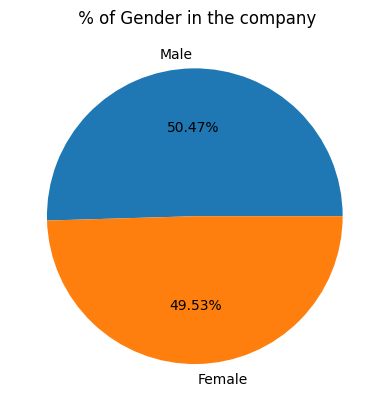

In [ ]:
plt.title(' % of Gender in the company')
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%.02f%%')
plt.show()

`Churn rate according to gender`

In [ ]:
male_churn_no = df[df['gender'] == 'Male']['Churn'].value_counts()[0]
male_churn_yes = df[df['gender'] == 'Male']['Churn'].value_counts()[1]
print('Male Leaving the company :',male_churn_yes)
print('Male Stayed the company :',male_churn_no)

Male Leaving the company : 930
Male Stayed the company : 2619


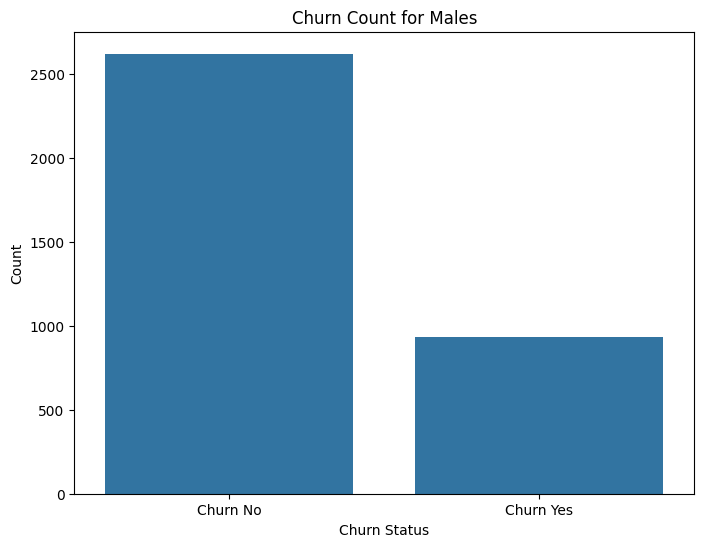

In [ ]:
values = [male_churn_no, male_churn_yes]
categories = ['Churn No', 'Churn Yes']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values)

# Customize the plot
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count for Males')

# Show the plot
plt.show()

In [ ]:
female_churn_no = df[df['gender'] == 'Female']['Churn'].value_counts()[0]
female_churn_yes = df[df['gender'] == 'Female']['Churn'].value_counts()[1]
print('Female Leaving the company :',female_churn_yes)
print('Female Stayed the company :',female_churn_no)

Female Leaving the company : 939
Female Stayed the company : 2544


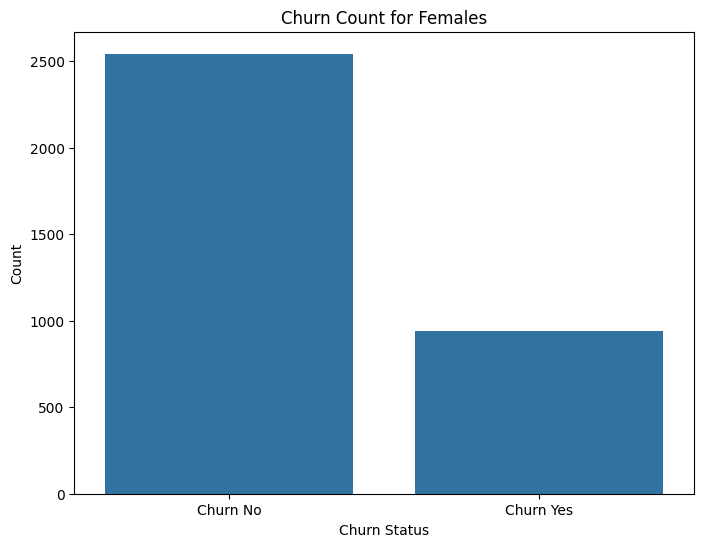

In [ ]:
values = [female_churn_no, female_churn_yes]
categories = ['Churn No', 'Churn Yes']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values)

# Customize the plot
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count for Females')

# Show the plot
plt.show()

### Employee vs Churn

`Over-all Churn rate`

Text(0.5, 1.0, 'Over-all Churn')

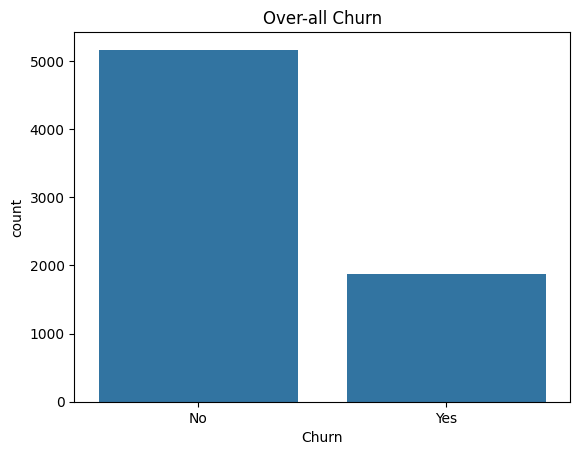

In [ ]:
sns.countplot(x='Churn',data=df)
plt.title('Over-all Churn')

In [ ]:
# arround 1500 employee leave the number it'a a huge number by the way

### Tenure vs Churn rate

`Let's see the churn rate according to churn rate`

<ipython-input-181-1a14545966a3>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='tenure', ylabel='Density'>

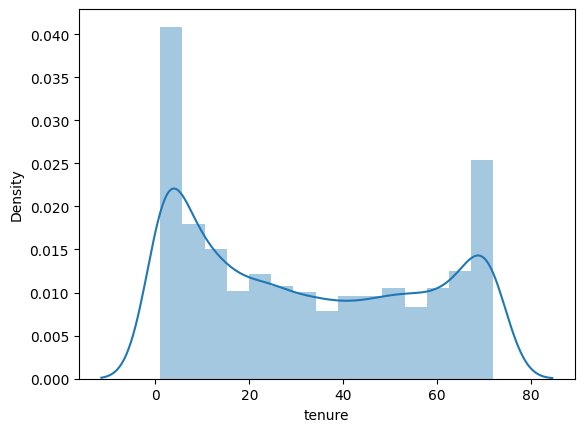

In [ ]:
sns.distplot(df['tenure'])

In [ ]:
df['tenure'].min(), df['tenure'].max()

(1, 72)

`Creating bins/group so that we can easily visualize and see the meaningfull insights`

In [ ]:
df['tenure_bin'] = df['tenure']

<ipython-input-183-44dd25eccfbd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create bins
bins = pd.cut(df['tenure_bin'], bins=[0, 10, 20, 30, 40, 50, 60, 70 ,80], labels=['0-10', '10-20', '20-30', '30-40', '40-50','50-60','60-70','70-80'])

# Add bins to DataFrame
df['tenure_bin'] = bins

<ipython-input-184-3cef5f498d55>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='tenure_bin', ylabel='count'>

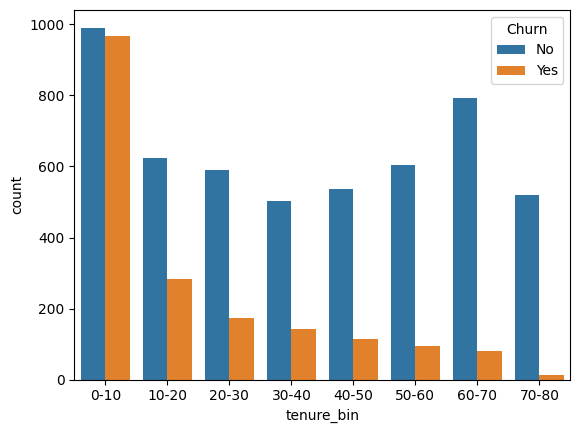

In [ ]:
sns.countplot(x='tenure_bin',hue='Churn',data=df)

`0-10 months employee leave the company more that the other`

In [ ]:
fig = px.bar(df, x='tenure_bin', y='Churn')

# customize the plot
fig.update_layout(title='Histogram for Two Variables',
                  xaxis_title='tenure',
                  yaxis_title='MonthlyCharges')

# show the plot
fig.show()

#### **Conclusion :** 0-10 months experience employee in the company leave the compnay most than the other ones

### Contract vs Churn rate

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

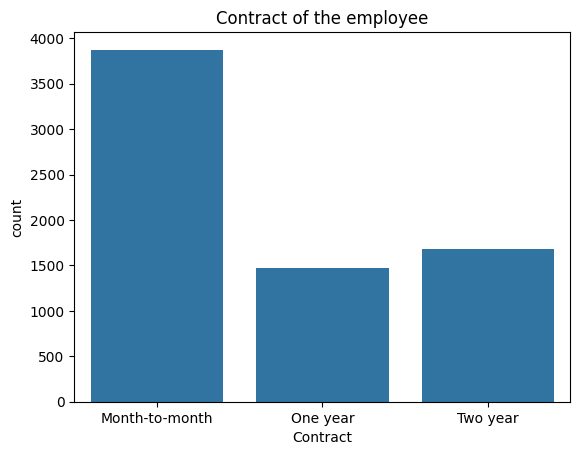

In [ ]:
sns.countplot(x='Contract',data=df)
plt.title('Contract of the employee')
plt.show()

`Let's see the churn rate according to the contract type`

In [ ]:
df[df['Contract'] == 'Month-to-month']['Churn'].value_counts()

Churn
No     2220
Yes    1655
Name: count, dtype: int64

In [ ]:
contract_mtm_churn_yes = df[df['Contract'] == 'Month-to-month']['Churn'].value_counts()[1]
contract_mtm_churn_no = df[df['Contract'] == 'Month-to-month']['Churn'].value_counts()[0]

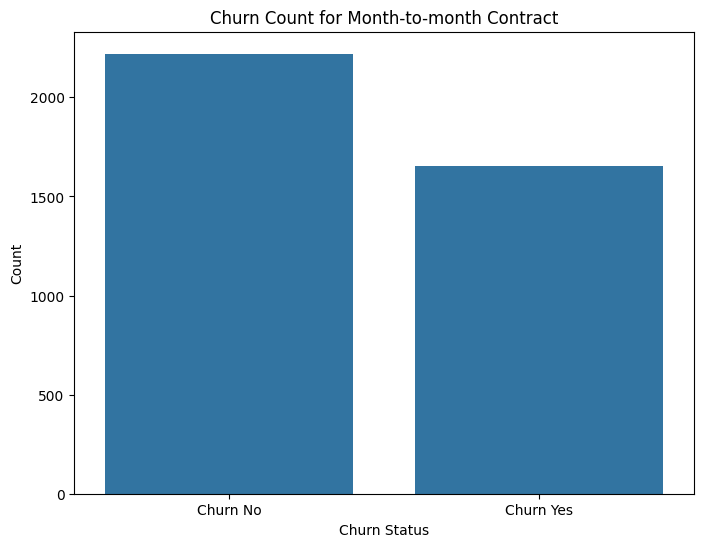

In [ ]:
values = [contract_mtm_churn_no, contract_mtm_churn_yes]
categories = ['Churn No', 'Churn Yes']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values)

# Customize the plot
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count for Month-to-month Contract')

# Show the plot
plt.show()

`Arround 1500 employee leave the company over 3875 means it is almost half of the number`

In [ ]:
df[df['Contract'] == 'One year']['Churn'].value_counts()

Churn
No     1306
Yes     166
Name: count, dtype: int64

In [ ]:
contract_one_year_churn_yes = df[df['Contract'] == 'One year']['Churn'].value_counts()[1]
contract_one_year_churn_no = df[df['Contract'] == 'One year']['Churn'].value_counts()[0]

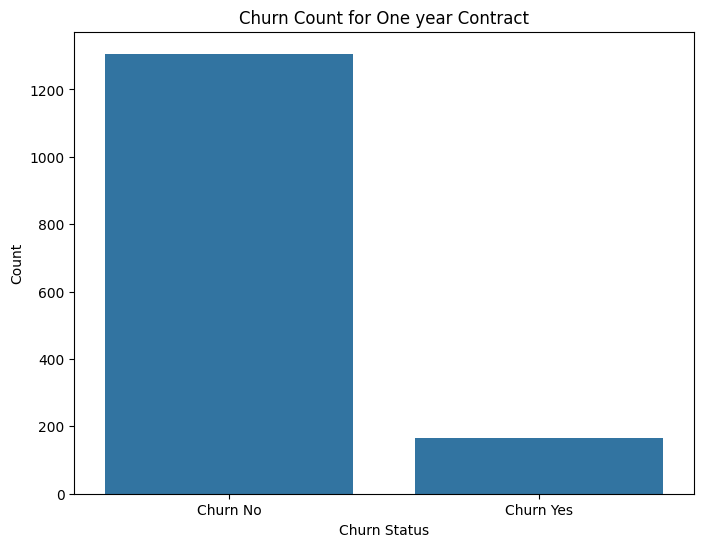

In [ ]:
values = [contract_one_year_churn_no, contract_one_year_churn_yes]
categories = ['Churn No', 'Churn Yes']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values)

# Customize the plot
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count for One year Contract')

# Show the plot
plt.show()

In [ ]:
df[df['Contract'] == 'Two year']['Churn'].value_counts()

Churn
No     1637
Yes      48
Name: count, dtype: int64

In [ ]:
contract_two_year_churn_yes = df[df['Contract'] == 'Two year']['Churn'].value_counts()[1]
contract_two_year_churn_no = df[df['Contract'] == 'Two year']['Churn'].value_counts()[0]

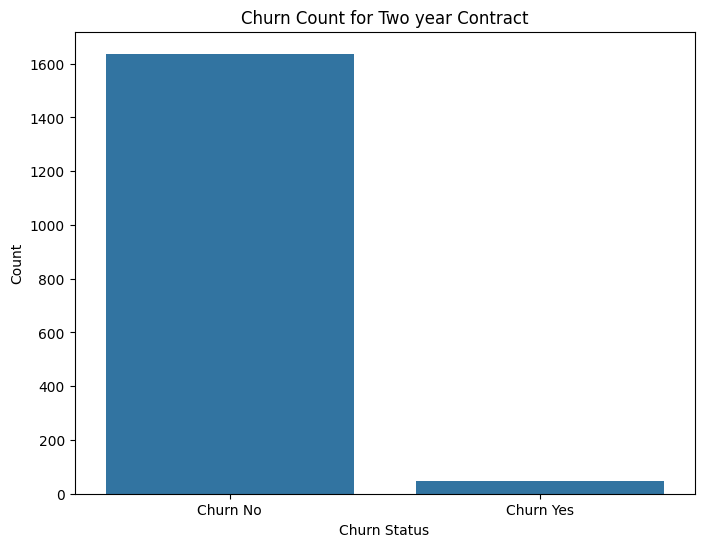

In [ ]:
values = [contract_two_year_churn_no, contract_two_year_churn_yes]
categories = ['Churn No', 'Churn Yes']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values)

# Customize the plot
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count for Two year Contract')

# Show the plot
plt.show()

#### **Conclusion :** Month-to-month contract employee leave the company most then other contracts

### MonthlyCharges along with Contract

In [ ]:
# over-all employee having month-to-month contract monthlycharges spending
df[df['Contract'] == 'Month-to-month']['MonthlyCharges'].sum()

257294.15000000002

In [ ]:
# based on the money they spend on the totalcharges 1655 employee leave the company
df[df['Contract'] == 'Month-to-month'][['MonthlyCharges','Churn_num']].sum()

MonthlyCharges    257294.15
Churn_num           1655.00
dtype: float64

In [ ]:
df[df['Contract'] == 'One year']['MonthlyCharges'].sum()

95796.9

In [ ]:
# based on the money they spend on the totalcharges 166 employee leave the company
df[df['Contract'] == 'One year'][['MonthlyCharges','Churn_num']].sum()

MonthlyCharges    95796.9
Churn_num           166.0
dtype: float64

In [ ]:
df[df['Contract'] == 'Two year']['MonthlyCharges'].sum()

102569.95

In [ ]:
# based on the money they spend on the totalcharges 48 employee leave the company
df[df['Contract'] == 'Two year'][['MonthlyCharges','Churn_num']].sum()

MonthlyCharges    102569.95
Churn_num             48.00
dtype: float64

In [ ]:
# Anither way to find the MonthlyCharges vs Contract
df[['Contract','MonthlyCharges']].groupby(['Contract']).sum()

,MonthlyCharges
Contract,
Month-to-month,257294.15
One year,95796.90
Two year,102569.95


In [ ]:
fig = px.histogram(x='Contract',y='MonthlyCharges',data_frame=df)
fig.update_layout(title='Contract type vs MonthlyCharges',
                  xaxis_title='Contract Type',
                  yaxis_title='MonthlyCharges')
fig.show()

`Average MonthlyCharges on the basis of Contract`

In [ ]:
df[['Contract','MonthlyCharges']].groupby(['Contract']).mean()

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.079416
Two year,60.872374


Text(0.5, 1.0, 'MonthlyCharges vs Churned')

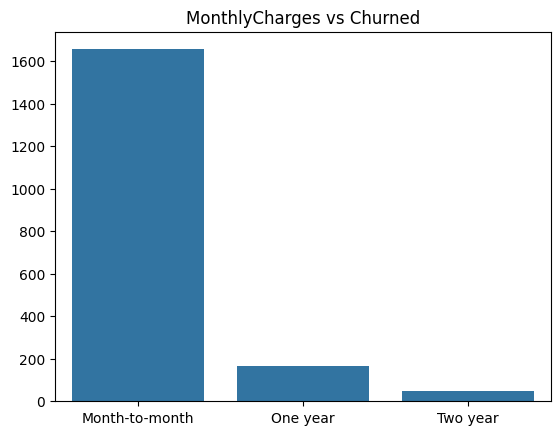

In [ ]:
values = [df[df['Contract'] == 'Month-to-month'][['MonthlyCharges','Churn_num']].sum()[1],df[df['Contract'] == 'One year'][['MonthlyCharges','Churn_num']].sum()[1],df[df['Contract'] == 'Two year'][['MonthlyCharges','Churn_num']].sum()[1]]
label = ['Month-to-month','One year','Two year']
sns.barplot(y=values,x=label)
plt.title('MonthlyCharges vs Churned')

Text(0.5, 1.0, 'Monthlycharges vs tenure churned')

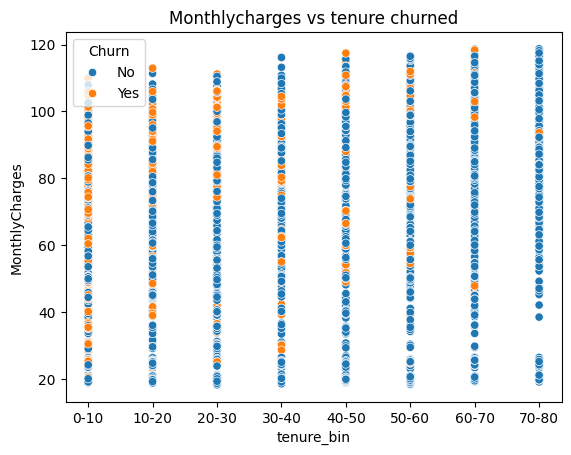

In [ ]:
sns.scatterplot(data=df,y='MonthlyCharges',x='tenure_bin',hue='Churn')
plt.title('Monthlycharges vs tenure churned')

#### **Conculsion :** Month-to-month contract employee leaving the company most due to high monthly-charges

### Contract-wise vs TotalCharges

In [ ]:
# over-all employee having month-to-month contract totalcharges spending
df[df['Contract'] == 'Month-to-month']['TotalCharges'].sum()

5305861.5

In [ ]:
# based on the money they spend on the totalcharges 1655 employee leave the company
df[df['Contract'] == 'Month-to-month'][['TotalCharges','Churn_num']].sum()

TotalCharges    5305861.5
Churn_num          1655.0
dtype: float64

In [ ]:
# over-all employee having one year contract totalcharges spending
df[df['Contract'] == 'One year']['TotalCharges'].sum()

4467053.5

In [ ]:
# based on the money they spend on the totalcharges 166 employee leave the company
df[df['Contract'] == 'One year'][['TotalCharges','Churn_num']].sum()

TotalCharges    4467053.5
Churn_num           166.0
dtype: float64

In [ ]:
# over-all employee having two year contract totalcharges spending
df[df['Contract'] == 'Two year']['TotalCharges'].sum()

6283253.7

In [ ]:
# based on the money they spend on the totalcharges 48 employee leave the company
df[df['Contract'] == 'Two year'][['TotalCharges','Churn_num']].sum()

TotalCharges    6283253.7
Churn_num            48.0
dtype: float64

In [ ]:
# Anither way to find the MonthlyCharges vs Contract
df[['Contract','TotalCharges']].groupby(['Contract']).sum()

,TotalCharges
Contract,
Month-to-month,5305861.5
One year,4467053.5
Two year,6283253.7


In [ ]:
fig = px.histogram(x='Contract',y='TotalCharges',data_frame=df)
fig.update_layout(title='Contract type vs TotalCharges',
                  xaxis_title='Contract Type',
                  yaxis_title='TotalCharges')
fig.show()

In [ ]:
df[['Contract','TotalCharges']].groupby(['Contract']).mean()

,TotalCharges
Contract,
Month-to-month,1369.254581
One year,3034.683084
Two year,3728.933947


Text(0.5, 1.0, 'TotalCharges vs Churned')

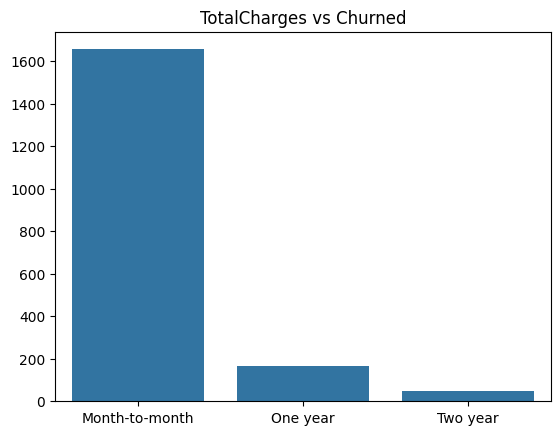

In [ ]:
values = [df[df['Contract'] == 'Month-to-month'][['TotalCharges','Churn_num']].sum()[1],df[df['Contract'] == 'One year'][['TotalCharges','Churn_num']].sum()[1],df[df['Contract'] == 'Two year'][['TotalCharges','Churn_num']].sum()[1]]
label = ['Month-to-month','One year','Two year']
sns.barplot(y=values,x=label)
plt.title('TotalCharges vs Churned')

**Conculsion :** Arrond 1600 employee leave the company due to high totalCharges and monthly charges

### PaymentMethod vs Churn

In [ ]:
df.groupby('PaymentMethod', as_index=False).count()[['PaymentMethod','Churn']].sort_values(by='Churn', ascending=False).head(15)

,PaymentMethod,Churn
2,Electronic check,2365
3,Mailed check,1604
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521


<Axes: xlabel='count', ylabel='PaymentMethod'>

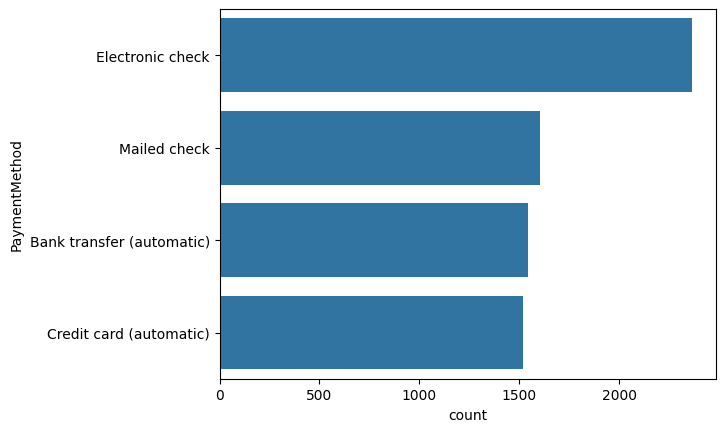

In [ ]:
sns.countplot(df['PaymentMethod'])

In [ ]:
fig = px.histogram(data_frame=df,x='PaymentMethod',color='Churn')
# customize the plot
fig.update_layout(title='PaymentMethod vs Churn',
                  xaxis_title='PaymentMethod',
                  yaxis_title='Count')
fig.show()

`Let's see percentage-wise employee leaving the company due to PaymentMethods`

In [ ]:
electronic_df = df[df['PaymentMethod'] == 'Electronic check']
mail_df = df[df['PaymentMethod'] == 'Mailed check']
credit_df = df[df['PaymentMethod'] == 'Credit card (automatic)']
bank_df = df[df['PaymentMethod'] == 'Bank transfer (automatic)']

In [ ]:
electronic_df['Churn'].value_counts(),mail_df['Churn'].value_counts(),credit_df['Churn'].value_counts(),bank_df['Churn'].value_counts()

(Churn
 No     1294
 Yes    1071
 Name: count, dtype: int64,
 Churn
 No     1296
 Yes     308
 Name: count, dtype: int64,
 Churn
 No     1289
 Yes     232
 Name: count, dtype: int64,
 Churn
 No     1284
 Yes     258
 Name: count, dtype: int64)

In [ ]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [ ]:
credit_df['Churn'].value_counts()

Churn
No     1289
Yes     232
Name: count, dtype: int64

In [ ]:
electronic_check_per = electronic_df['Churn'].value_counts()[1] / df['PaymentMethod'].value_counts()[0] * 100
mail_check_per = mail_df['Churn'].value_counts()[1] / df['PaymentMethod'].value_counts()[1] * 100
credit_check_per = credit_df['Churn'].value_counts()[1] / df['PaymentMethod'].value_counts()[3] * 100
bank_check_per = bank_df['Churn'].value_counts()[1] / df['PaymentMethod'].value_counts()[2] * 100

In [ ]:
print('Percentage of Churned employee with Electronic check :',electronic_check_per)
print('Percentage of Churned employee with Mail check :',mail_check_per)
print('Percentage of Churned employee with Credit card :',credit_check_per)
print('Percentage of Churned employee with Bank transfer :',bank_check_per)

Percentage of Churned employee with Electronic check : 45.28541226215645
Percentage of Churned employee with Mail check : 19.201995012468828
Percentage of Churned employee with Credit card : 15.253122945430638
Percentage of Churned employee with Bank transfer : 16.731517509727624


#### **Conculsion :** 45 % employee leave the company which has Electronic check as there PaymenyMethod

### PaymentMethod vs Contract type

`Analysing which employee leaving the copmany from various contract type`

In [ ]:
df.groupby(['Contract','PaymentMethod','Churn'],as_index=False).count()[['Churn_num','PaymentMethod','Contract','Churn']]

,Churn_num,PaymentMethod,Contract,Churn
0,388,Bank transfer (automatic),Month-to-month,No
1,201,Bank transfer (automatic),Month-to-month,Yes
2,365,Credit card (automatic),Month-to-month,No
3,178,Credit card (automatic),Month-to-month,Yes
4,856,Electronic check,Month-to-month,No
5,994,Electronic check,Month-to-month,Yes
6,611,Mailed check,Month-to-month,No
7,282,Mailed check,Month-to-month,Yes
8,353,Bank transfer (automatic),One year,No
9,38,Bank transfer (automatic),One year,Yes


`Conculsion : employee who having month-month contract leaving the company most with every paytment method type`

### Churn accorrding to other services

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num', 'tenure_bin'],
      dtype='object')

### MultipleLines vs Churn

`Multipleline for month-to-month contract type`

<Axes: xlabel='MultipleLines', ylabel='count'>

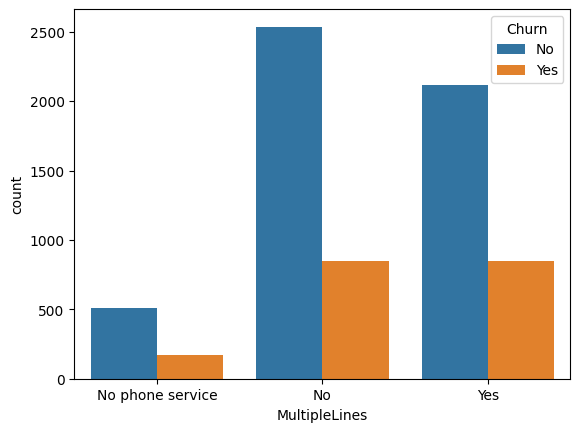

In [ ]:
sns.countplot(data=df,x='MultipleLines',hue='Churn')

In [ ]:
df[df['Contract']=='Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-10
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-10
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0-10
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,30-40
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,60-70
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0,10-20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,10-20


In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='MultipleLines',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having MultipleLines vs Churn',
                  xaxis_title='MultipleLines',
                  yaxis_title='Count')
fig.show()

`MulitipleLine vs One year contract`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='One year'],x='MultipleLines',color='Churn')
fig.update_layout(title='One year(contract type) having MultipleLines vs Churn',
                  xaxis_title='MultipleLines',
                  yaxis_title='Count')
fig.show()

`MulitipleLine vs Two year contract`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Two year'],x='MultipleLines',color='Churn')
fig.update_layout(title='Two year(contract type) having MultipleLines vs Churn',
                  xaxis_title='MultipleLines',
                  yaxis_title='Count')
fig.show()

#### **Conculsion :** here mixed opinon employee have about Multipltlines but if we talk about month-to-month contract employee which have and have not Multipleline as service provided by the company

### InternetService vs Churn

`InternetService vs month-to-month contract`

<Axes: xlabel='InternetService', ylabel='count'>

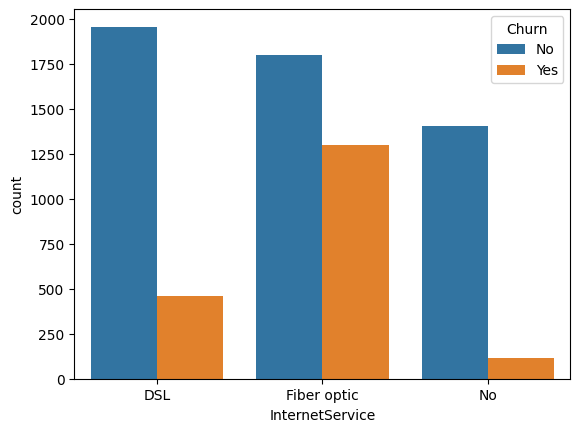

In [ ]:
sns.countplot(data=df,x='InternetService',hue='Churn')

In [ ]:
df[df['Contract']=='Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-10
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-10
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0-10
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,30-40
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,60-70
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0,10-20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,10-20


In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='InternetService',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having InternetService vs Churn',
                  xaxis_title='InternetService',
                  yaxis_title='Count')
fig.show()

`InternetService with one year contract`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='One year'],x='InternetService',color='Churn')
fig.update_layout(title='One year(contract type) having InternetService vs Churn',
                  xaxis_title='InternetService',
                  yaxis_title='Count')
fig.show()

`Internet Serivce with Two year contract employees`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Two year'],x='InternetService',color='Churn')
fig.update_layout(title='Two year(contract type) having InternetService vs Churn',
                  xaxis_title='InternetService',
                  yaxis_title='Count')
fig.show()

#### **Conclusion :** Employee which ahve FiberOptics as there InternetService that leave the company the most than the other services present

### StreamingTV vs Churn

`streamingtv with month-to-month contract employee`

<Axes: xlabel='StreamingTV', ylabel='count'>

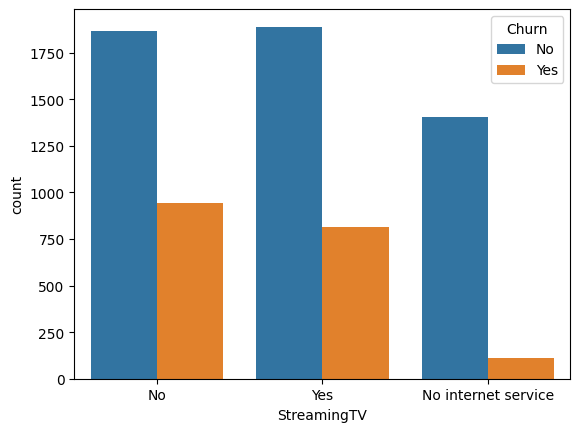

In [ ]:
sns.countplot(data=df,x='StreamingTV',hue='Churn')

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='StreamingTV',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having StreamingTV vs Churn',
                  xaxis_title='StreamingTV',
                  yaxis_title='Count')
fig.show()

`streamingtv with one yaer contract employee`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='One year'],x='StreamingTV',color='Churn')
fig.update_layout(title='One year(contract type) having StreamingTV vs Churn',
                  xaxis_title='StreamingTV',
                  yaxis_title='Count')
fig.show()

`Streamingtv with two year contract employee`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Two year'],x='StreamingTV',color='Churn')
fig.update_layout(title='Two year(contract type) having StreamingTV vs Churn',
                  xaxis_title='StreamingTV',
                  yaxis_title='Count')
fig.show()

#### **Conclusion :** StreamingTV dooesn't make any sense regarding to churn rate because there are some equal type of people that like to streammovies and not

### StreamingMovies vs Churn

`StreamingMovies with the employee having month-to-month contract`

<Axes: xlabel='StreamingMovies', ylabel='count'>

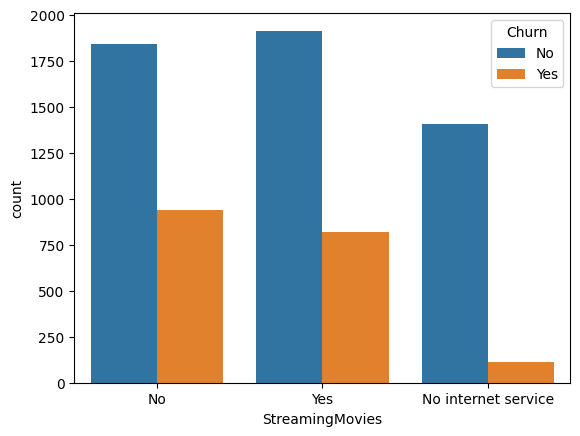

In [ ]:
sns.countplot(data=df,x='StreamingMovies',hue='Churn')

In [ ]:
df[df['Contract']=='Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-10
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-10
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0-10
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,30-40
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,60-70
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0,10-20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,10-20


In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='StreamingMovies',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having StreamingMovies vs Churn',
                  xaxis_title='StreamingMovies',
                  yaxis_title='Count')
fig.show()

`Streaming movies with one year employee contract`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='One year'],x='StreamingMovies',color='Churn')
fig.update_layout(title='One year(contract type) having StreamingMovies vs Churn',
                  xaxis_title='StreamingMovies',
                  yaxis_title='Count')
fig.show()

`Employee having two year contract with streamingmovies`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Two year'],x='StreamingMovies',color='Churn')
fig.update_layout(title='Two year(contract type) having StreamingMovies vs Churn',
                  xaxis_title='StreamingMovies',
                  yaxis_title='Count')
fig.show()

#### **Conclusion :** Employee have mixed opion about Streamingmovies parameter

### OnlineSecurity vs churn

<Axes: xlabel='OnlineSecurity', ylabel='count'>

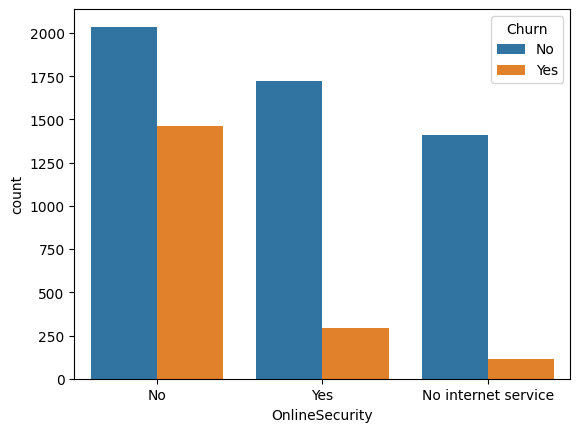

In [ ]:
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')

In [ ]:
df[df['Contract']=='Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-10
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-10
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0-10
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,30-40
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,60-70
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0,10-20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,10-20


In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='OnlineSecurity',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having OnlineSecurity vs Churn',
                  xaxis_title='OnlineSecurity',
                  yaxis_title='Count')
fig.show()

`OnlineSecurity with ine yera contract employee`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='One year'],x='OnlineSecurity',color='Churn')
fig.update_layout(title='One year(contract type) having OnlineSecurity vs Churn',
                  xaxis_title='OnlineSecurity',
                  yaxis_title='Count')
fig.show()

`Employee having two year contact with online-security parameter`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Two year'],x='OnlineSecurity',color='Churn')
fig.update_layout(title='Two year(contract type) having OnlineSecurity vs Churn',
                  xaxis_title='OnlineSecurity',
                  yaxis_title='Count')
fig.show()

#### **Conclusion :** Emplyee having month-to-month contract on the company leave the company than other contract employee having no Online-security service

### Onlinebackup vs churn

<Axes: xlabel='OnlineBackup', ylabel='count'>

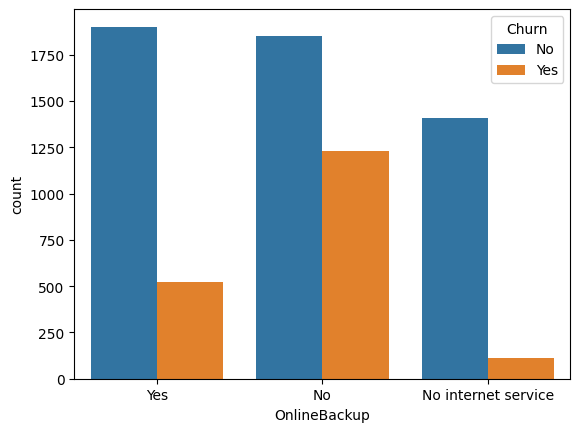

In [ ]:
sns.countplot(data=df,x='OnlineBackup',hue='Churn')

In [ ]:
df[df['Contract']=='Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-10
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-10
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0-10
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,30-40
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,60-70
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0,10-20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,10-20


In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='OnlineBackup',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having OnlineBackup vs Churn',
                  xaxis_title='OnlineBackup',
                  yaxis_title='Count')
fig.show()

`Online-backup with one and two yaer employee contract`

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='One year'],x='OnlineBackup',color='Churn')
fig.update_layout(title='One year(contract type) having OnlineBackup vs Churn',
                  xaxis_title='OnlineBackup',
                  yaxis_title='Count')
fig.show()

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Two year'],x='OnlineBackup',color='Churn')
fig.update_layout(title='Two year(contract type) having OnlineBackup vs Churn',
                  xaxis_title='OnlineBackup',
                  yaxis_title='Count')
fig.show()

#### **Conculsion :** month-to-month contract employee leaving more the company having no Online-backup services

### Seniorcitizen vs Churn

<Axes: xlabel='SeniorCitizen', ylabel='count'>

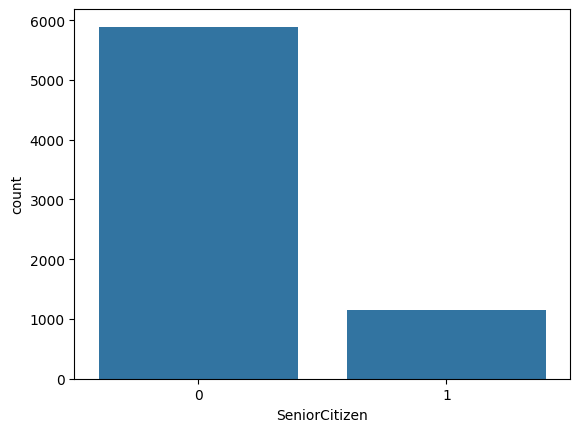

In [ ]:
sns.countplot(data=df,x='SeniorCitizen')

Text(0.5, 1.0, 'Senior-Citizen vs Churn')

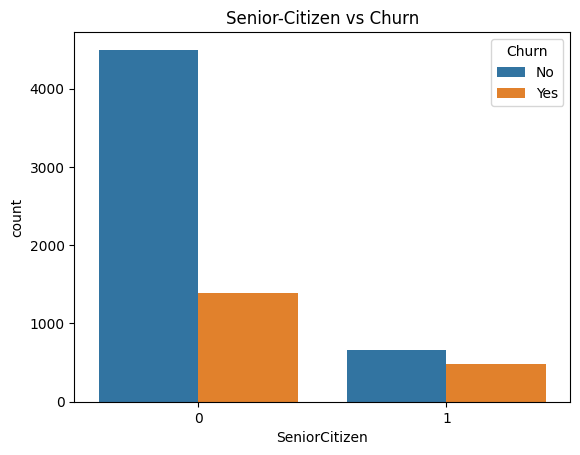

In [ ]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.title('Senior-Citizen vs Churn')

In [ ]:
df[df['Contract']=='Month-to-month']['SeniorCitizen'].value_counts()

SeniorCitizen
0    3068
1     807
Name: count, dtype: int64

In [ ]:
df[df['Contract']=='Month-to-month'][['SeniorCitizen','Churn']].value_counts()

SeniorCitizen  Churn
0              No       1854
               Yes      1214
1              Yes       441
               No        366
Name: count, dtype: int64

#### **Conculsion :** half of the senior citizen leave the company among all senior citizen employee

### Dependent vs Churn

In [ ]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

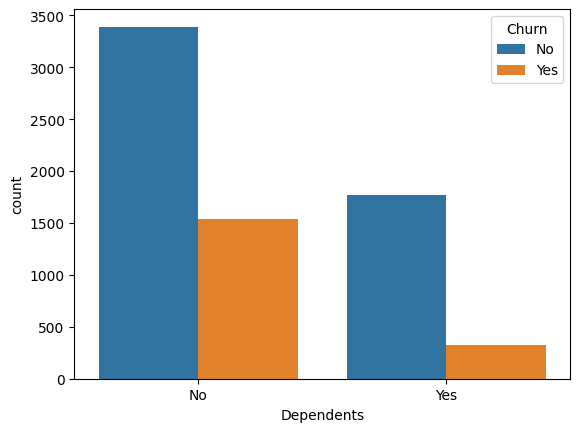

In [ ]:
sns.countplot(data=df,x='Dependents',hue='Churn')

**Conclusion :** the one who are not dependent are leaving company 45 % among all non-dependent employess

In [ ]:
df[df['Contract']=='Month-to-month']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-10
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-10
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-10
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,0-10
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,30-40
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,60-70
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,0,10-20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,10-20


In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='Dependents',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having Dependents vs Churn',
                  xaxis_title='Dependents',
                  yaxis_title='Count')
fig.show()

### Partner vs Churn

In [ ]:
fig = px.histogram(data_frame=df[df['Contract']=='Month-to-month'],x='Partner',color='Churn')
fig.update_layout(title='Month-to-Month(contract type) having Partner vs Churn',
                  xaxis_title='Partner',
                  yaxis_title='Count')
fig.show()

In [ ]:
fig = px.histogram(data_frame=df,x='tenure_bin',color='Partner')
fig.update_layout(title='tenure vs Partner',
                  xaxis_title='tenure',
                  yaxis_title='Count')
fig.show()

#### **Conculsion** : 0-10 tenure employee hvae no partner and depenedets and they leave the company the most

## Key Findings


After a thorough examination of the dataset, several critical factors contributing to employee churn have been identified:

**Tenure and Dependents:**

 * Early Tenure Exodus : `Employees with a short tenure of 0-10 months, particularly those without partners or dependents, exhibit the highest churn rates. This suggests that new employees who lack familial or social anchors are more likely to leave.`

* Non-Dependent Employees : `Among all employees, 45% of those without dependents tend to leave, highlighting the potential instability in this group.`

**Senior Citizens:**

* Significant Senior Churn : `Notably, half of the senior citizen employees depart from the company, indicating a possible need for targeted retention strategies for this demographic.`

**Contract Type:**

* Month-to-Month Contracts : `Employees on month-to-month contracts are significantly more likely to leave, especially when they lack online backup or online security services. This contract type correlates strongly with higher churn due to perceived instability and lack of commitment.`

* Financial Burden : `High monthly charges are a critical factor driving away month-to-month contract employees, suggesting that cost sensitivity is a major concern.`

**Internet and Streaming Services:**

* FiberOptics Users : `Employees using FiberOptics Internet Service exhibit the highest churn rates compared to other internet services, possibly due to service issues or higher costs.`

* Streaming Services : `There is no clear correlation between streaming TV or movies and churn, indicating that these services do not significantly impact employee retention.`

**Payment Method:**

* Electronic Check Users : `A notable 45% of employees who use Electronic Check as their payment method choose to leave the company, hinting at potential dissatisfaction with this payment process.`

**Charges:**

* High Financial Burden : `Approximately 1,600 employees cite high total charges and monthly charges as their reasons for leaving, emphasizing the need for a review of the company's pricing structure.`


## Final Conclusion



To effectively reduce employee churn, the company must address these critical areas:

* **Enhancing New Employee Experience :** `Develop robust onboarding and retention programs for employees with short tenures, especially those without partners or dependents.`

* **Supporting Senior Employees :**`Implement targeted support and retention initiatives for senior citizen employees.`

* **Reviewing Contract Terms :** `Reassess the month-to-month contract offerings and consider adding benefits or incentives to enhance stability and commitment.`

* **Optimizing Costs :** `Evaluate and potentially revise the pricing structure to make monthly and total charges more manageable for employees.`

* **Improving Service Quality :** `Ensure high-quality internet services, particularly for those using FiberOptics, and enhance the availability and quality of online security and backup services.`

* **Streamlining Payment Methods :** `Revisit the payment methods, focusing on improving the experience for those using Electronic Check to reduce dissatisfaction.`

By addressing these areas, the company can create a more supportive and stable work environment, thereby significantly reducing employee churn and fostering long-term loyalty.

## Cross-Validation

`Cross-checking the ingights that we finded by analyzing the main dataframe`

`We're analyzing the dataframe that are created by the machine learning model that predict the churn or not`

`Here we take only those rows which are predicted by our model(as churned) but in the real data they are not churned`

`We're doimg this because we want to see the belonging of the employee in the company`

In [ ]:
churn_df = pd.read_csv('/content/predicted_churn_dataframe (1).csv')

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predicted_churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Yes
2,4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No,Yes
3,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,Yes
4,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No,Yes


`Rows amd Column in the data`

In [ ]:
print('Rows in the data :',churn_df.shape[0])
print('Columns in the data :',churn_df.shape[1])

Rows in the data : 532
Columns in the data : 22


## Anlayzing

###Gender vs Churn

In [ ]:
churn_df['gender'].value_counts()

gender
Female    272
Male      260
Name: count, dtype: int64

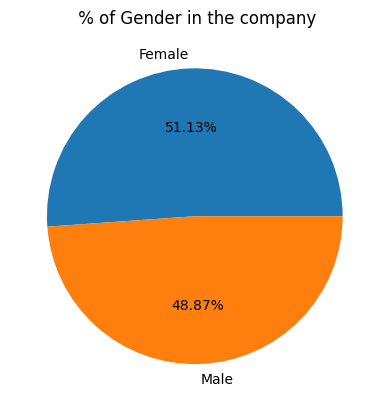

In [ ]:
plt.title(' % of Gender in the company')
plt.pie(churn_df['gender'].value_counts(),labels=['Female','Male'],autopct='%.02f%%')
plt.show()

### Churn vs tenure

<ipython-input-12-662eedcd3bd8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_df['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

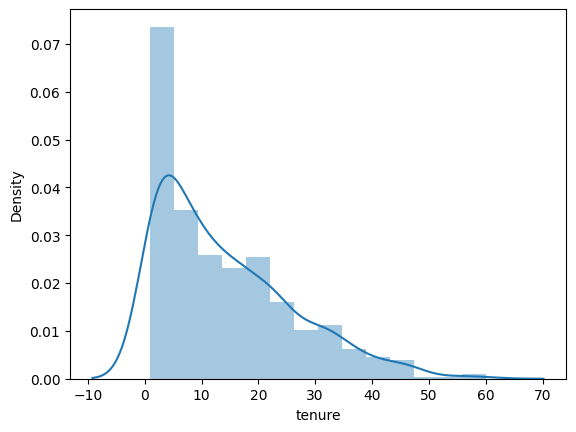

In [ ]:
sns.distplot(churn_df['tenure'])

In [ ]:
churn_df['tenure'].min(), churn_df['tenure'].max()

(1, 60)

`Creating bins/group so that we can easily visualize and see the meaningfull insights`

In [ ]:
churn_df['tenure_bin'] = churn_df['tenure']

In [ ]:
# Create bins
bins = pd.cut(churn_df['tenure_bin'], bins=[0, 10, 20, 30, 40, 50, 60, 70], labels=['0-10', '10-20', '20-30', '30-40', '40-50','50-60','60-70'])

# Add bins to DataFrame
churn_df['tenure_bin'] = bins

<Axes: xlabel='tenure_bin', ylabel='count'>

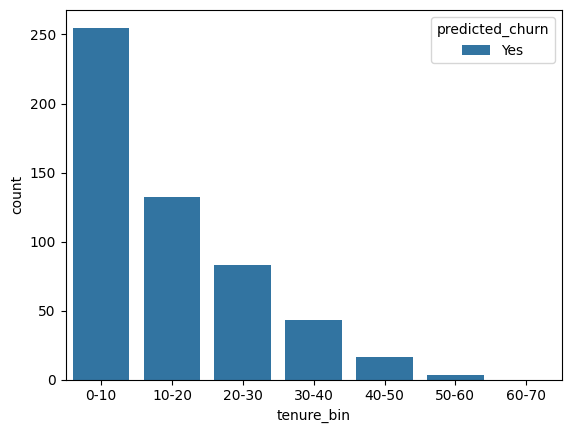

In [ ]:
sns.countplot(x='tenure_bin',hue='predicted_churn',data=churn_df)

####Conclusion : Employee having 0-10 tenure leads to leave the company

### Contract vs churn

In [ ]:
churn_df['Contract'].unique()

array(['Month-to-month'], dtype=object)

<Axes: xlabel='Contract', ylabel='count'>

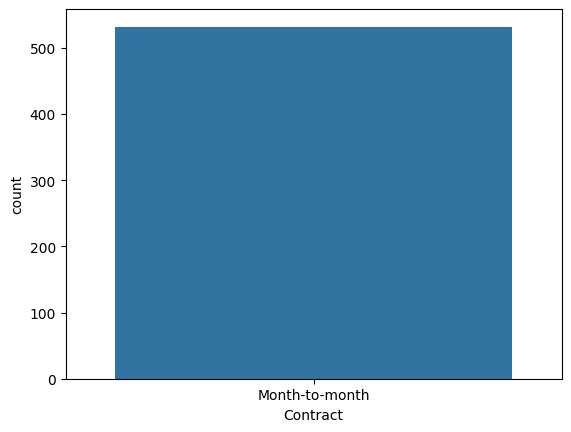

In [ ]:
sns.countplot(x='Contract',data=churn_df)

#### Conclusion : Only people having Month-to-Month contract leave the company

### MonthlyCharges vs Churn

In [ ]:
churn_df['MonthlyCharges'].sum()

43627.84999999999

In [ ]:
fig = px.histogram(x='Contract',y='MonthlyCharges',data_frame=churn_df)
fig.update_layout(title='Contract type vs MonthlyCharges',
                  xaxis_title='Contract Type',
                  yaxis_title='MonthlyCharges')
fig.show()

Text(0.5, 1.0, 'Monthlycharges vs tenure churned')

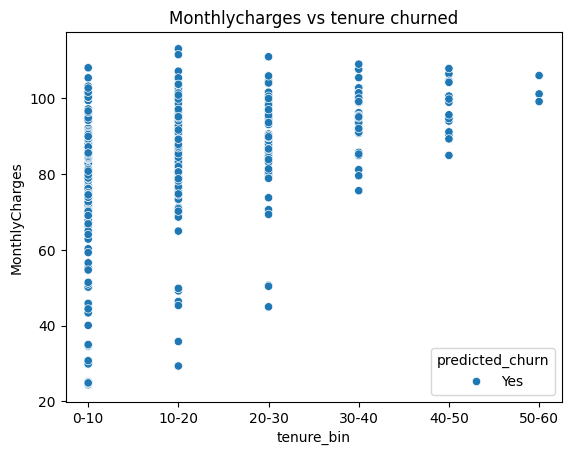

In [ ]:
sns.scatterplot(data=churn_df,y='MonthlyCharges',x='tenure_bin',hue='predicted_churn')
plt.title('Monthlycharges vs tenure churned')

#### Conlusion : High MonthlyCharges Cause high churn rate among any tenure range

### PaymentMethod vs Churn

In [ ]:
churn_df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             338
Credit card (automatic)       75
Mailed check                  64
Bank transfer (automatic)     55
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='PaymentMethod'>

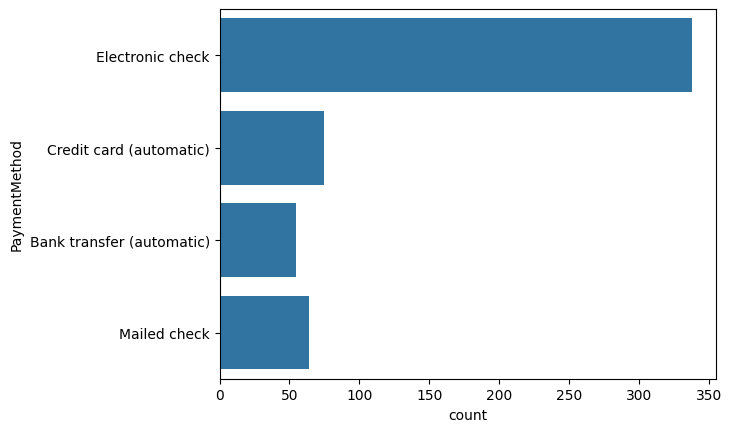

In [ ]:
sns.countplot(churn_df['PaymentMethod'])

In [ ]:
fig = px.histogram(data_frame=churn_df,x='PaymentMethod',color='predicted_churn')
# customize the plot
fig.update_layout(title='PaymentMethod vs Churn',
                  xaxis_title='PaymentMethod',
                  yaxis_title='Count')
fig.show()

#### Conclusion : Electronic check causes more churn among the employee

### MultipleLines vs Churn

In [ ]:
churn_df['MultipleLines'].value_counts()

MultipleLines
Yes                 254
No                  246
No phone service     32
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

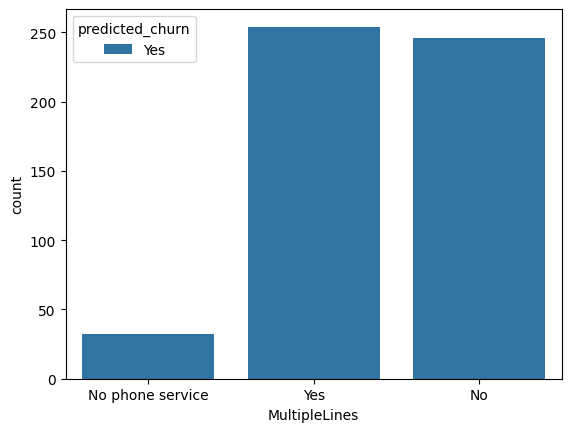

In [ ]:
sns.countplot(data=churn_df,x='MultipleLines',hue='predicted_churn')

#### Conclusion : employee having and not having MultipleLines both leave the company most

### InternetService vs Churn

<Axes: xlabel='InternetService', ylabel='count'>

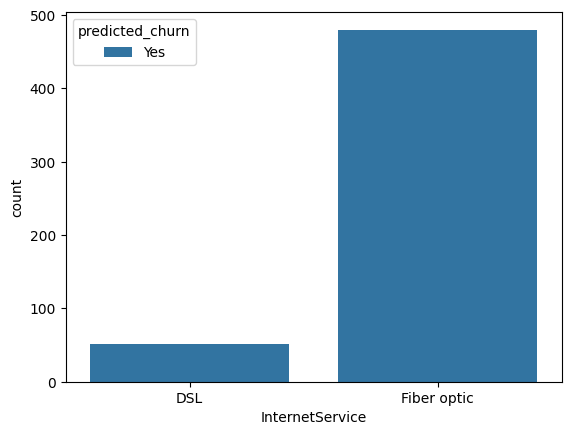

In [ ]:
sns.countplot(data=churn_df,x='InternetService',hue='predicted_churn')

In [ ]:
fig = px.histogram(data_frame=churn_df,x='InternetService',color='predicted_churn')
fig.update_layout(title='Month-to-Month(contract type) having InternetService vs Churn',
                  xaxis_title='InternetService',
                  yaxis_title='Count')
fig.show()

#### Conclusion : employee having Fiber-optic as there Internet-Service leave the company most

### StreamingTV vs Churn

<Axes: xlabel='StreamingTV', ylabel='count'>

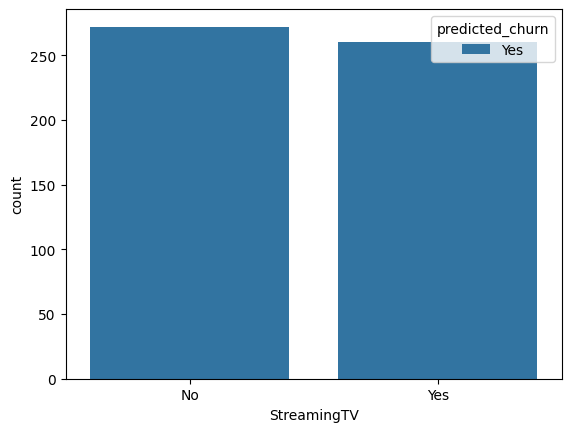

In [ ]:
sns.countplot(data=churn_df,x='StreamingTV',hue='predicted_churn')

#### Conlusion : both enployee having streamingTv or not as there service leave the company

### StreamingMovies vs Churn

<Axes: xlabel='StreamingMovies', ylabel='count'>

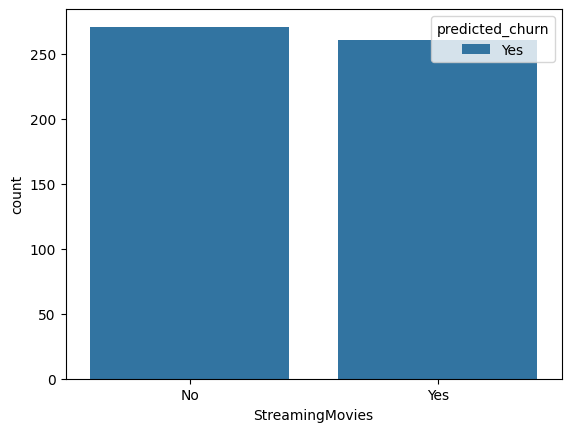

In [ ]:
sns.countplot(data=churn_df,x='StreamingMovies',hue='predicted_churn')

#### Conlusion : both enployee having streamingMovies or not as there service leave the company

### Online-Service vs Churn

In [ ]:
fig = px.histogram(data_frame=churn_df,x='OnlineSecurity',color='predicted_churn')
fig.update_layout(title='Month-to-Month(contract type) having OnlineSecurity vs Churn',
                  xaxis_title='OnlineSecurity',
                  yaxis_title='Count')
fig.show()

#### Conclusion : Employee having No Online-Serives leads to leave the company most

### Partner vs Churn

In [ ]:
fig = px.histogram(data_frame=churn_df,x='Partner',color='predicted_churn')
fig.update_layout(title='Month-to-Month(contract type) having Partner vs Churn',
                  xaxis_title='Partner',
                  yaxis_title='Count')
fig.show()

#### Concluison : Employee having No Partner tends to leave the most

## Analysis of Predicted Employee Churn Using Machine Learning Model
`Based on the machine learning model's predictions and subsequent analysis of employees who are likely to churn despite not having done so yet, the following conclusions have been drawn:`

**Tenure:**

* Short Tenure Impact:` Employees with a tenure of 0-10 months show a high likelihood of leaving the company, indicating that short tenure is a strong predictor of churn.`

**Contract Type:**

* Month-to-Month Contracts: `Employees with month-to-month contracts are the most likely to churn, underscoring the instability associated with this contract type.`

**Monthly Charges:**

* Cost Sensitivity: `High monthly charges are a significant factor contributing to churn across all tenure ranges, suggesting that cost management is crucial for retention.`

**Payment Method:**

* Electronic Check: `Employees using Electronic Check as their payment method exhibit a higher propensity to churn, indicating dissatisfaction with this payment process.`

**Phone Service:**

* Multiple Lines: `Churn is prevalent among employees regardless of whether they have multiple phone lines, indicating that this factor alone is not a deterrent.`

**Internet Service:**

* Fiber-Optic Service: `Employees with Fiber-Optic Internet Service are the most likely to leave, suggesting issues related to this service type.`

**Streaming Services:**

* Streaming TV and Movies: `The presence or absence of streaming TV or streaming movies services does not significantly impact churn, as employees with both configurations are equally likely to leave.`

**Online Services:**

* Lack of Online Services: `Employees without online security or backup services show a higher likelihood of churn, indicating that these services are important for employee retention.`

**Dependents and Partners:**

* Absence of Partners: `Employees without partners tend to have a higher churn rate, suggesting that personal support systems play a role in retention.`

**Final Technical Insights:**

`The predictive analysis indicates that employees are at a higher risk of leaving the company due to a combination of short tenure, month-to-month contracts, high monthly charges, and the use of Electronic Check for payments. Additionally, Fiber-Optic Internet Service and the absence of online security or backup services are significant churn predictors. The presence of streaming services and multiple phone lines does not substantially influence churn rates, while the lack of partners is a notable factor contributing to employee attrition.`

`To mitigate these risks, targeted interventions focusing on improving contract stability, cost management, payment method satisfaction, and enhancing online services could be highly effective. Addressing these areas will help create a more supportive environment and reduce the likelihood of future churn.`